In [2]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [4]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

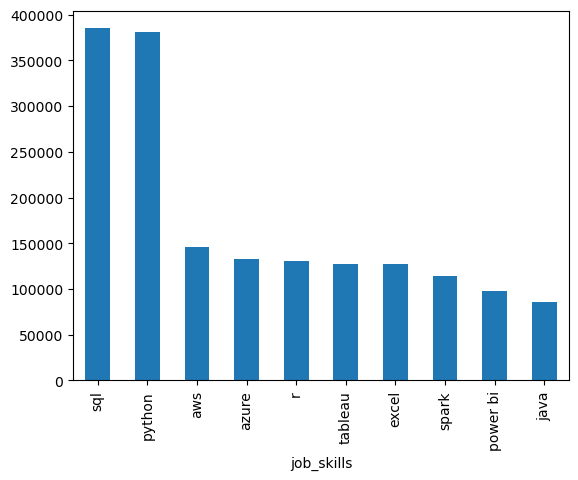

In [5]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [7]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

In [10]:
df_skills_count = skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


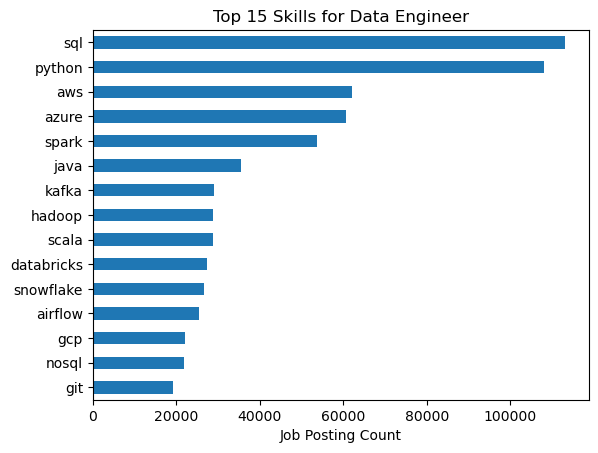

In [19]:
job_title = 'Data Engineer'  # Example job title to filter skills
top_skills = 15

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(x='job_skills', y='skill_count', kind='barh')
plt.title(f'Top {top_skills} Skills for {job_title}')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()
